In [25]:
%matplotlib inline
import numpy as np                                                         
from matplotlib.pyplot import *                                            
import os                                                                  
import sys                                                                 
                                                                           
caffe_root = os.environ["CAFFE_ROOT"]                                      
def analyze_log(fileName):                                                 
    data = open(fileName, "r")                                             
    y = []                                                                 
    for line in data:                                                      
        y.append(float(line.split()[0]))                                   
                                                                           
    return y                                                               
                                                                           
def analyze_log_ave(fileName):                                             
    data = open(fileName, "r")                                             
    y = []                                                                 
    line_cnt = 0                                                           
    for line in data:                                                      
        tmp_y = []                                                         
        tmp_y.append(float(line.split()[0]))                               
        line_cnt = line_cnt + 1                                            
        if line_cnt == 10:                                                 
            y.append(reduce(lambda x, y: x + y, tmp_y) / float(len(tmp_y)))
            line_cnt = 0                                                   
    return y                                                               

In [26]:
folder = "tmp/"       
fileName = "/home/maohz12/pruning/1_scripts/analyze_vgg_model/finetune_log/6_4_momentum_5e-4.log"

os.system('mkdir ' + caffe_root + "/2_results/" + folder)                                      
os.system(caffe_root + '/1_scripts/extract_trace.sh ' + fileName + ' ' + folder) 


0

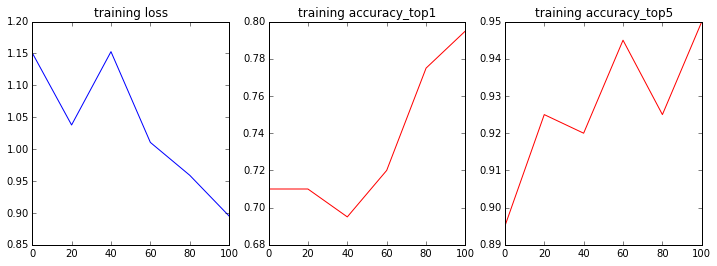

In [27]:

fileName1 = caffe_root + "/2_results/" + folder + "train_loss.csv"                             
fileName2 = caffe_root + "/2_results/" + folder + "train_acc_top1.csv"                         
fileName3 = caffe_root + "/2_results/" + folder + "train_acc_top5.csv"                         
fileName4 = caffe_root + "/2_results/" + folder + "test_loss.csv"                              
fileName5 = caffe_root + "/2_results/" + folder + "test_acc_top1.csv"                          
fileName6 = caffe_root + "/2_results/" + folder + "test_acc_top5.csv"                          
#   """                                                                                        
y_loss = analyze_log_ave(fileName1)                                                            
y_top1 = analyze_log_ave(fileName2)                                                            
y_top5 = analyze_log_ave(fileName3)                                                            
                                                                                               
                                                                                               
x = [x * 20  for x in xrange(len(y_loss))]     
figure(figsize=(12,4))
subplot(1, 3, 1)                                                                               
plot(x, y_loss)                                                                                
title ("training loss")                                                                        
                                                                                               
subplot(1, 3, 2)                                                                               
plot(x, y_top1, 'r')                                                                           
title ("training accuracy_top1")                                                               
                                                                                               
subplot(1, 3, 3)      
plot(x, y_top5, 'r')                                                             
title ("training accuracy_top5")                                                 
draw()                                                                           
#   """                                                                          
                                                                                 
figure()                                                                         


==============result=============
original accuracy  (57.23%, 80.27%)

best top5 accuracy (56.82%, *80.13%*)
=> accuracy loss   (0.41%, 0.14%)

best top1 accuracy (*56.82%*, 80.11%)
=> accuracy loss   (0.40%, 0.15%)
best loss = 1.88


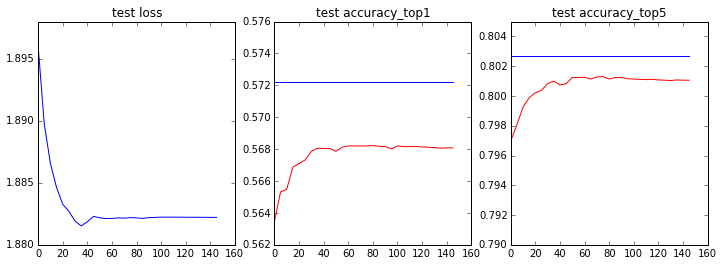

In [28]:
                                                                                 
y_loss = analyze_log(fileName4)                                                  
y_top1 = analyze_log(fileName5)                                                  
y_top5 = analyze_log(fileName6)                                                  
top1_ori, top5_ori = (0.572259 * 100, 0.802681 * 100)                            
                                                                                 
print "==============result============="                                        
print "original accuracy  (%.2f%%, %.2f%%)" % (top1_ori, top5_ori)               
                                                                                 
top5 = np.max(y_top5) * 100                                                      
idx = np.argmax(y_top5)                                                          
top1 = y_top1[idx] * 100                                                         
print "\nbest top5 accuracy (%.2f%%, *%.2f%%*)" % (top1, top5)                   
print "=> accuracy loss   (%.2f%%, %.2f%%)" % (top1_ori - top1, top5_ori - top5) 

top1 = np.max(y_top1) * 100                                                      
idx = np.argmax(y_top1)                                                          
top5 = y_top5[idx] * 100                                                         
print "\nbest top1 accuracy (*%.2f%%*, %.2f%%)" % (top1, top5)                   
print "=> accuracy loss   (%.2f%%, %.2f%%)" % (top1_ori - top1, top5_ori - top5) 
print "best loss = %.2f" % (np.min(y_loss))                                      
x = [x * 5 for x in xrange(len(y_loss))]    
top1_ori = [0.5722] * len(x)
top5_ori = [0.8027] * len(x)

figure(figsize=(12,4))
subplot(1, 3, 1)  

plot(x, y_loss)  
title ("test loss")                                                              
                                                                                 
subplot(1, 3, 2)     
ylim(0.562,0.576)
plot(x, y_top1, 'r')    
plot(x, top1_ori, 'b')
title ("test accuracy_top1")                                                     
                                                                                 
subplot(1, 3, 3)     
ylim(0.79,0.805)
plot(x, y_top5, 'r')    
plot(x, top5_ori, 'b')
title ("test accuracy_top5")                                                     
show()                                                                           

In [29]:
y_loss

[1.89609,
 1.88977,
 1.88657,
 1.88462,
 1.88327,
 1.8827,
 1.88192,
 1.88152,
 1.88186,
 1.88229,
 1.88218,
 1.88212,
 1.88212,
 1.88217,
 1.88215,
 1.88219,
 1.88217,
 1.88213,
 1.88219,
 1.88221,
 1.88223,
 1.88223,
 1.88223,
 1.88223,
 1.88222,
 1.88222,
 1.88222,
 1.88222,
 1.88221,
 1.88221]